In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf

In [2]:
dataset = pd.read_csv("combined_data.csv")
dataset.head(10)

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1
5,5,I have to jiggle the plug to get it to line up...,0
6,6,If you have several dozen or several hundred c...,0
7,7,If you are Razr owner...you must have this!,1
8,8,Needless to say I wasted my money.,0
9,9,What a waste of money and time!.,0


In [3]:
#Fetching Sentences from data
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

#seperating the train and test data
length = int(len(sentences)* 0.8)

training_sentences = sentences[0:length]
testing_sentences = sentences[length:]

length_labels = int(len(labels) *  0.8)

training_labels = labels[0:length_labels]
testing_labels = labels[length_labels:]

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

# Tokenize the dataset (with tweaks!)
Now, we'll tokenize the dataset, but we can make some changes to this from before. Previously, we used:

vocab_size = 1000

embedding_dim = 16

max_length = 100

trunc_type='post'

padding_type='post'

How might changing the vocab_size, embedding_dim or max_length affect how the model performs?

In [4]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
padded_training = tf.keras.preprocessing.sequence.pad_sequences(training_sequences,maxlen = max_length,padding='post', truncating='post')

testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
padded_testing = tf.keras.preprocessing.sequence.pad_sequences(testing_sequence, maxlen= max_length, padding = 'post', truncating='post')

# Train a Sentiment Model (with tweaks!)
We'll use a slightly different model here, using GlobalAveragePooling1D instead of Flatten()

In [25]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(tf.keras.layers.GlobalAveragePooling1D()) #We are using GlobalAveragePooling1D instead of flatten layer
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [26]:
#Fitting the model
#early_stopping = tf.keras.callbacks.EarlyStopping(patience=15) You con use early stopping as well
history = model.fit(padded_training, training_labels_final, epochs=30, validation_data=(padded_testing, testing_labels_final))

Epoch 1/30


C:\Users\Mustafa Hasnain\anaconda3\lib\site-packages\keras\backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


50/50 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5223 - val_loss: 0.6975 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5229 - val_loss: 0.6980 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5443 - val_loss: 0.6938 - val_accuracy: 0.4536
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5769 - val_loss: 0.6899 - val_accuracy: 0.4862
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6114 - val_loss: 0.6868 - val_accuracy: 0.4912
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6416 - val_loss: 0.6645 - val_accuracy: 0.6266
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7075 - val_loss: 0.6548 - val_accuracy: 0.5865
Epoch 8/30
50/50 [=============

# Visualize the training graph
You can use the code below to visualize the training and validation accuracy while you try out different tweaks to the hyperparameters and model.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


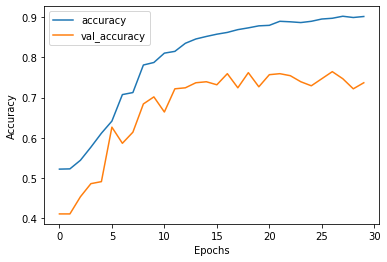

In [30]:
import matplotlib.pyplot as plt
columns = history.history.keys()
print(a)
def plot_graph():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'val_accuracy'])
    plt.show()

plot_graph()

# Get files for visualizing the network
The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the checkbox to "sphereize" the data.

Note: You may run into errors with the projection if your vocab_size earlier was larger than the actual number of words in the vocabulary, in which case you'll need to decrease this variable and re-train in order to visualize.



In [ ]:
#Skipping For now

# Predicting Sentiment in New Reviews
Below, we've again included some example new reviews you can test your results on.

In [33]:
other_sentences = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

sample_sequences = tokenizer.texts_to_sequences(other_sentences)
sample_padding = tf.keras.preprocessing.sequence.pad_sequences(sample_sequences, padding='post',maxlen=max_length)

In [35]:
prediction = model.predict(sample_padding)

for i in range(len(other_sentences)):
    print(other_sentences[i])
    print(prediction[i])
    print('\n')

I love this phone
[0.9360131]


I hate spaghetti
[0.16236451]


Everything was cold
[0.62322503]


Everything was hot exactly as I wanted
[0.4307291]


Everything was green
[0.62322503]


the host seated us immediately
[0.6179483]


they gave us free chocolate cake
[0.8919087]


not sure about the wilted flowers on the table
[0.07770881]


only works when I stand on tippy toes
[0.9069644]


does not work when I stand on my head
[0.03917348]


